In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

prepare dataset

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_n = X_train/X_train.max()
X_test_n = X_test/X_test.max()

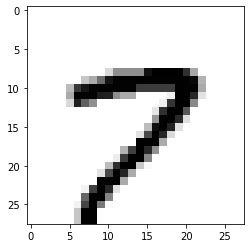

In [13]:
plt.imshow(X_train_n[123], cmap="binary")
plt.show()

In [14]:
X_train_n.shape

(60000, 28, 28)

In [15]:
X_train_n = X_train_n.reshape(-1, 28, 28, 1)
X_test_n = X_test_n.reshape(-1, 28, 28, 1)
X_train_n.shape

(60000, 28, 28, 1)

build model

In [30]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X_train_n.shape[1:], activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape=X_train_n.shape[1:], activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16, activation="relu"))

model.add(Dense(16, activation="softmax"))

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["acc", "sparse_categorical_accuracy"])

In [31]:
history = model.fit(X_train_n, y_train, validation_data=(X_test_n, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2876 - acc: 0.9114 - sparse_categorical_accuracy: 0.9114 - val_loss: 0.0965 - val_acc: 0.9709 - val_sparse_categorical_accuracy: 0.9709
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0984 - acc: 0.9696 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.0804 - val_acc: 0.9747 - val_sparse_categorical_accuracy: 0.9747
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0731 - acc: 0.9776 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.0626 - val_acc: 0.9803 - val_sparse_categorical_accuracy: 0.9803
